### Get the data
### what is the target
### Take the target and observe downtrend or uptrend
### Create input(features) and ouputs(target)
### Train_test_split
### Reshape the inputs
### Create a Model
### Compile the model with the proper optimizer and loss
### Evaluate the model with test data



In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [2]:
!ls 'My Drive/Summer internship'

1908_17155_bundle_archive.zip  all_stocks_5yr.csv
20-06-2020.ipynb	       titanic.csv


In [3]:
#all_stocks_5yr.csv
import pandas as pd
data = pd.read_csv('My Drive/Summer internship/all_stocks_5yr.csv')
data.shape

(619040, 7)

In [4]:
# Top Five rows
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [5]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [6]:
data['Name'].value_counts()

IT      1259
LKQ     1259
MU      1259
GE      1259
KLAC    1259
        ... 
DXC      215
BHGE     152
BHF      143
DWDP     109
APTV      44
Name: Name, Length: 505, dtype: int64

In [7]:
### How many company's data we have here?
data.Name.nunique()

505

In [8]:
## Selecting the data 
df = data[data['Name']=='IT']
df.shape

(1259, 7)

In [9]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [10]:
#select the columns data and close price
df = df[['date','close']]
df

,date,close
310226,2013-02-08,49.75
310227,2013-02-11,49.49
310228,2013-02-12,49.37
310229,2013-02-13,48.90
310230,2013-02-14,48.53
...,...,...
311480,2018-02-01,138.83
311481,2018-02-02,135.19
311482,2018-02-05,128.25
311483,2018-02-06,124.02


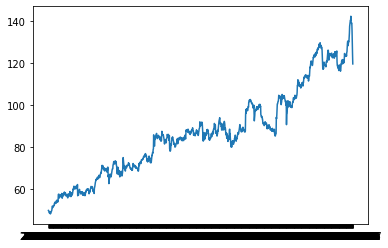

In [11]:
#line plot
import matplotlib.pyplot as plt
plt.plot(df['date'],df['close'])

In [12]:
df.date[:10]

310226    2013-02-08
310227    2013-02-11
310228    2013-02-12
310229    2013-02-13
310230    2013-02-14
310231    2013-02-15
310232    2013-02-19
310233    2013-02-20
310234    2013-02-21
310235    2013-02-22
Name: date, dtype: object

In [13]:
### Missing values in the data
df.isnull().sum()

date     0
close    0
dtype: int64

In [14]:
df.shape

(1259, 2)

In [15]:
## Preparing the data
## Features and target
## Input and output
## last 7 days data as input
## X -- [[d1-d7],[d9,d15],[d17,23]....]
## y -- [d8,d16,d24,...]

## X = [[d1-d7],[d2-d8],]
## y = [d8,d9]

X = [] ## input
y = [] ## ouput
for i  in range(df.shape[0]-7-1):   
  X.append(df['close'][i:i+7])# 0 -->[0:7], 1-->[1:8]
  y.append(df['close'][i+310232])# 7,8,9
print(X[:2])

[310226    49.75
310227    49.49
310228    49.37
310229    48.90
310230    48.53
310231    48.91
310232    49.24
Name: close, dtype: float64, 310227    49.49
310228    49.37
310229    48.90
310230    48.53
310231    48.91
310232    49.24
310233    48.86
Name: close, dtype: float64]


In [16]:
import numpy as np
X = np.array(X)

In [17]:
df1 = pd.DataFrame(X,columns=['d1','d2','d3','d4','d5','d6','d7'])
df1.head()

,d1,d2,d3,d4,d5,d6,d7
0,49.75,49.49,49.37,48.90,48.53,48.91,49.24
1,49.49,49.37,48.90,48.53,48.91,49.24,48.86
2,49.37,48.90,48.53,48.91,49.24,48.86,48.10
3,48.90,48.53,48.91,49.24,48.86,48.10,48.61
4,48.53,48.91,49.24,48.86,48.10,48.61,48.55


In [18]:
df1['d8'] = y
df1.head()

,d1,d2,d3,d4,d5,d6,d7,d8
0,49.75,49.49,49.37,48.90,48.53,48.91,49.24,49.24
1,49.49,49.37,48.90,48.53,48.91,49.24,48.86,48.86
2,49.37,48.90,48.53,48.91,49.24,48.86,48.10,48.10
3,48.90,48.53,48.91,49.24,48.86,48.10,48.61,48.61
4,48.53,48.91,49.24,48.86,48.10,48.61,48.55,48.55


In [19]:
df1.shape

(1251, 8)

In [20]:
1251 * 0.8

1000.8000000000001

In [21]:
## Train test split
X_train = df1.iloc[0:1000,0:7]
X_test = df1.iloc[1000:,0:7]
y_train =  df1['d8'][:1000]
y_test  = df1['d8'][1000:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1000, 7)
(1000,)
(251, 7)
(251,)


In [22]:
## Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = pd.DataFrame(sc.transform(X_train),columns = X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns = X_train.columns)
X_train_sc.describe()

,d1,d2,d3,d4,d5,d6,d7
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-5.968559e-16,-1.175504e-15,1.058709e-15,-2.959855e-16,1.021405e-17,-5.686562e-16,-1.377343e-15
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.150998e+00,-2.156544e+00,-2.162303e+00,-2.168235e+00,-2.174344e+00,-2.180577e+00,-2.186786e+00
25%,-7.504945e-01,-7.451615e-01,-7.404116e-01,-7.401319e-01,-7.324680e-01,-7.321696e-01,-7.330637e-01
50%,3.319703e-01,3.290788e-01,3.262289e-01,3.237880e-01,3.259284e-01,3.276665e-01,3.244810e-01
75%,6.819188e-01,6.797063e-01,6.791706e-01,6.769461e-01,6.741578e-01,6.718548e-01,6.706903e-01
max,1.878906e+00,1.877092e+00,1.875478e+00,1.874056e+00,1.872665e+00,1.871256e+00,1.869931e+00


In [23]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam',loss='mse')

In [25]:
X_test.shape

(251, 7)

In [26]:
# number of records , time steps,Features
X_train_sc = X_train_sc.values.reshape(1000,7,1)
X_test_sc = X_test_sc.values.reshape(251,7,1)

In [27]:
history = model.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

Train on 1000 samples, validate on 251 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 5442.5378 - val_loss: 9065.2280
Epoch 2/100
1000/1000 [==============================] - 1s 977us/step - loss: 2709.0970 - val_loss: 7256.9568
Epoch 3/100
1000/1000 [==============================] - 1s 960us/step - loss: 1803.6557 - val_loss: 5909.1202
Epoch 4/100
1000/1000 [==============================] - 1s 984us/step - loss: 1246.2969 - val_loss: 4890.4413
Epoch 5/100
1000/1000 [==============================] - 1s 972us/step - loss: 870.3859 - val_loss: 4107.5437
Epoch 6/100
1000/1000 [==============================] - 1s 970us/step - loss: 615.8718 - val_loss: 3504.5285
Epoch 7/100
1000/1000 [==============================] - 1s 971us/step - loss: 449.2394 - val_loss: 3032.0953
Epoch 8/100
1000/1000 [==============================] - 1s 955us/step - loss: 342.3824 - val_loss: 2672.2719
Epoch 9/100
1000/1000 [==============================] - 1s 985us/step 

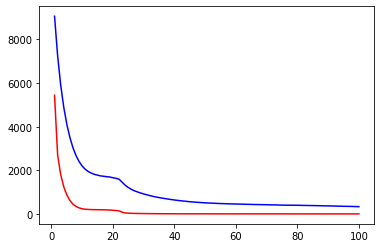

In [28]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')

In [29]:
model.predict(X_test_sc)

array([[ 99.71454 ],
       [ 99.713776],
       [ 99.69281 ],
       [ 99.79927 ],
       [100.11501 ],
       [100.4655  ],
       [100.75096 ],
       [100.95598 ],
       [101.14183 ],
       [101.33679 ],
       [101.40676 ],
       [101.3929  ],
       [101.43146 ],
       [101.4631  ],
       [101.493   ],
       [101.6087  ],
       [101.64146 ],
       [101.61713 ],
       [101.6342  ],
       [101.629166],
       [101.580536],
       [101.620705],
       [101.723495],
       [101.91182 ],
       [102.07898 ],
       [102.30104 ],
       [102.46623 ],
       [102.559296],
       [102.645065],
       [102.67749 ],
       [102.67937 ],
       [102.68031 ],
       [102.63477 ],
       [102.61753 ],
       [102.5962  ],
       [102.54506 ],
       [102.55892 ],
       [102.51468 ],
       [102.50466 ],
       [102.497444],
       [102.50217 ],
       [102.52217 ],
       [102.54751 ],
       [102.56262 ],
       [102.59653 ],
       [102.58803 ],
       [102.5818  ],
       [102.6

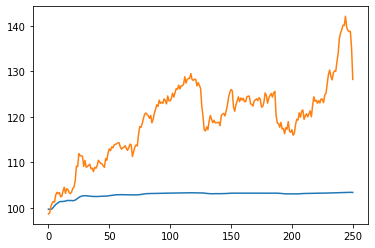

In [30]:
plt.plot(range(len(X_test_sc)),model.predict(X_test_sc).flat)
plt.plot(range(len(X_test_sc)),y_test)

### Reshape the inputs

In [31]:
X_test_sc[0].reshape(1,7,1)

array([[[1.51654775],
        [1.48174902],
        [1.44065066],
        [1.46292731],
        [1.49310207],
        [1.45345281],
        [1.42378485]]])

In [32]:
model.predict(X_test_sc[0].reshape(1,7,1))

array([[99.714554]], dtype=float32)

In [33]:
y_test[1000]

98.68

### Create a Model

In [34]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model2 = Sequential()
# 256 cels
model2.add(LSTM(256,input_shape=(7,1)))
model2.add(Dropout(0.3))
# single neuron
model2.add(Dense(1))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


### Compile the model with the proper optimizer and loss

In [35]:
model2.compile(optimizer='adam',loss='mse')

In [ ]:
history2 = model2.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

Train on 1000 samples, validate on 251 samples
Epoch 1/100
1000/1000 [==============================] - 1s 1ms/step - loss: 1284.0422 - val_loss: 268.0355
Epoch 2/100
1000/1000 [==============================] - 1s 1ms/step - loss: 146.4213 - val_loss: 34.3401
Epoch 3/100
1000/1000 [==============================] - 1s 993us/step - loss: 37.5032 - val_loss: 4.8909
Epoch 4/100
1000/1000 [==============================] - 1s 1ms/step - loss: 24.0812 - val_loss: 3.8241
Epoch 5/100
1000/1000 [==============================] - 1s 1ms/step - loss: 22.9888 - val_loss: 4.0413
Epoch 6/100
1000/1000 [==============================] - 1s 1ms/step - loss: 22.8510 - val_loss: 3.8844
Epoch 7/100
1000/1000 [==============================] - 1s 985us/step - loss: 22.9497 - val_loss: 3.8632
Epoch 8/100
1000/1000 [==============================] - 1s 1ms/step - loss: 22.4205 - val_loss: 3.6622
Epoch 9/100
1000/1000 [==============================] - 1s 1ms/step - loss: 21.0133 - val_loss: 3.3875
Epoch 1

In [36]:
tr_loss = history2.history['loss']
val_loss = history2.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')

NameError: ignored

In [37]:
model2.predict(X_test_sc)

array([[0.07892472],
       [0.0783652 ],
       [0.07827302],
       [0.07902794],
       [0.08012158],
       [0.08129637],
       [0.08306773],
       [0.08556163],
       [0.08820829],
       [0.09011133],
       [0.09147011],
       [0.09228763],
       [0.09316456],
       [0.0935901 ],
       [0.09393113],
       [0.09439962],
       [0.09488325],
       [0.09574876],
       [0.09625565],
       [0.09596529],
       [0.09541275],
       [0.09590529],
       [0.09634067],
       [0.09793434],
       [0.10107971],
       [0.10531312],
       [0.11022566],
       [0.11485001],
       [0.11914013],
       [0.12201472],
       [0.12251334],
       [0.12272464],
       [0.12105037],
       [0.11956955],
       [0.11826398],
       [0.11708438],
       [0.11688942],
       [0.1158167 ],
       [0.11544231],
       [0.11513107],
       [0.11479148],
       [0.11475715],
       [0.11567686],
       [0.11657318],
       [0.11773979],
       [0.11818555],
       [0.11846912],
       [0.118

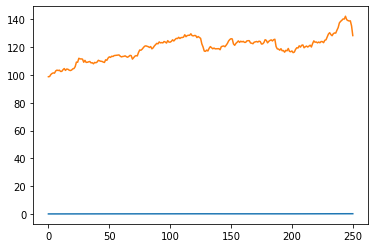

In [38]:
plt.plot(range(len(X_test_sc)),model2.predict(X_test_sc).flat)
plt.plot(range(len(X_test_sc)),y_test)